# Deconvolution of X-ray Spectrum

In this notebook we will show how to use our trained RIM (Recurrent Inference Machine) to deconvolve an X-ray spectrum.

## Why deconvolve X-ray spectrum?
We choose to deconvolve X-ray spectrum so that we can pass the true (or intrinstic) recovered spectrum to
a machine learning algorithm that will estimate the posterior distributions of the temperature and metallicity component.
This is useful because we can then pass those as priors to an MCMC fit. These mechanics of the methodology
is hashed out in this series of notebooks.

## Step 1: Inputs & Read Spectrum

In [48]:
# Inputs
from astropy.io import fits
import matplotlib.pyplot as plt
import scipy.stats as sps
import tensorflow as tf
import emcee

plt.rcParams['axes.facecolor'] = 'white'

In [22]:
spectrum = fits.open("../Data/test_spectrum.pha")
spectrum = spectrum[1].data
spectrum_axis = [s1[0] for s1 in spectrum]
spectrum_counts = [s1[1] for s1 in spectrum]

In [54]:
# Bin Data
bin_number = 200
binned = sps.binned_statistic(spectrum_axis, spectrum_counts, statistic='sum', bins=bin_number)
binned_errors = sps.binned_statistic(spectrum_axis, spectrum_counts, statistic='std', bins=bin_number).statistic
spectrum_counts_binned = binned.statistic
spectrum_axis_bin_edge = binned.bin_edges
bin_width = (spectrum_axis_bin_edge[1] - spectrum_axis_bin_edge[0])
spectrum_axis_binned = spectrum_axis_bin_edge[1:] - bin_width/2

Text(0, 0.5, 'Counts')

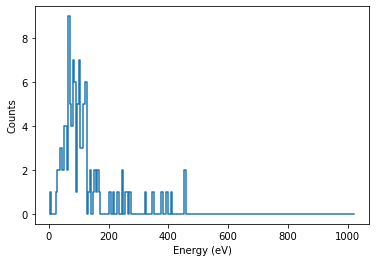

In [55]:
plt.step(spectrum_axis_binned, spectrum_counts_binned)
plt.xlabel('Energy (eV)')
plt.ylabel('Counts')

## Step 2: Apply RIM to deconvolve spectrum

## Step 3: Apply Convolutional Neural Network to extract Posterior on parameters

In [ ]:
bcnn = tf.keras.load_model('CHANDRA-I')

## Step 4: Run MCMC to obtain parameters using CNN posteriors as priors

